# Stochastic, interacting particles in time and space

**Susana Gomes (Mathematics Institute)**

**IATL Interdisciplinary Computer Modelling Module, 27th February 2018**


**Aim:**  Computer simulations are a powerful tool for modelling the real world. They are particlarly useful for modelling stochastic, interacting agents that move through space: these systems are very hard to treat mathematically. 

The goal of this lecture is to introduce stochastic, spatial simulations using diffusing and reacting particles as an example. The material covers many of the basics used for more complex simulational models in biology, chemistry, physics or sociophysics. 

**Example of stochastic interacting agents:**

 1. Bees, birds, fish

 2. Atoms, molecules

 3. People in crowds


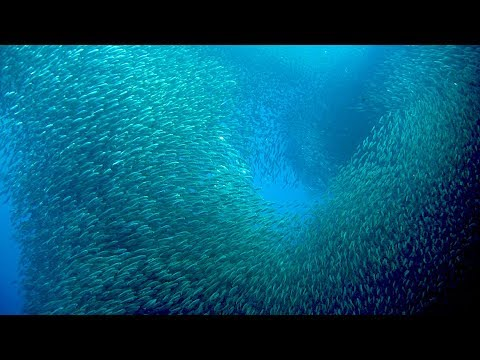

In [1]:
using PyCall 
@pyimport IPython.lib.display as pydisp 
pydisp.YouTubeVideo("Y-5ffl5_7AI")


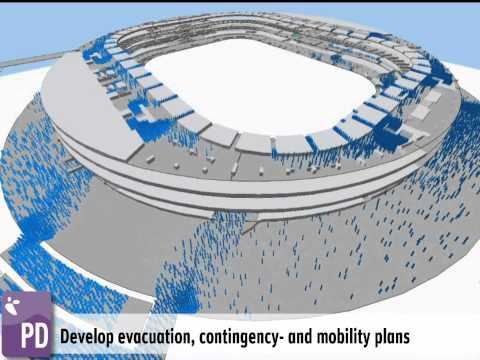

In [2]:
pydisp.YouTubeVideo("97QIFsVqeh4") 


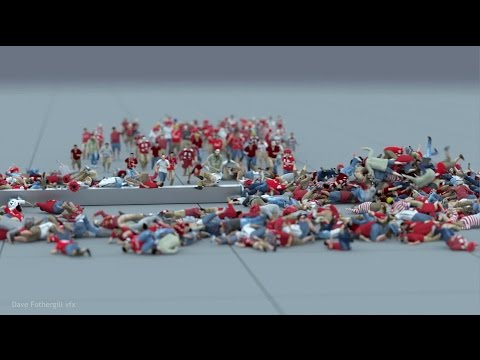

In [3]:
pydisp.YouTubeVideo("daysCqmqd2Y") 

# Today's lecture

**Section 1.** Sums of random numbers
* **1.1** Gaussian or normal random numbers  
* **1.2** Gaussian random numbers with any mean and variance    
* **1.3** Sums of Gaussian random numbers 
* **1.4** Sums of other random numbers: binary example  
* **1.5** Summary points

**Section 2.** Diffusion 
* **2.1** Simulating diffusion in one dimension  
* **2.2** Discrete space versus continuous space
* **2.3** Diffusion in two dimensions
* **2.4** Diffusion as a stochastic differential equation
* **2.5** Summary points

**Section 3.** Interacting particles  
* **3.1** Systems of stochastic differential equations
* **3.2** Interacting particles in 1D
* **3.3** Interacting particles in 2D
* **3.4** Collective behaviour and crowd dynamics
* **3.5** Summary points

In [4]:
# load up the plotting functions
using Plots
Plots.gr(fmt=:png);

# Section 1. Sums of random numbers

* **1.1** Gaussian or normal random numbers  
* **1.2** Gaussian random numbers with any mean and variance    
* **1.3** Sums of Gaussian random numbers 
* **1.4** Sums of other random numbers: binary example  
* **1.5** Summary points

---

## 1.1 Gaussian or normal random numbers

Standard normal random numbers have the property

* A mean of zero so that $\langle\phi\rangle = 0$

* A variance of one so that $\operatorname{Var} = \langle\phi^2\rangle - \langle\phi\rangle^2=1$

* The probability density for normal random numbers is the Gaussian

$$ p(\phi)=\frac{1}{\sqrt{2\pi}}\exp(-\phi^2/2) $$

* Can be generated by the command randn()


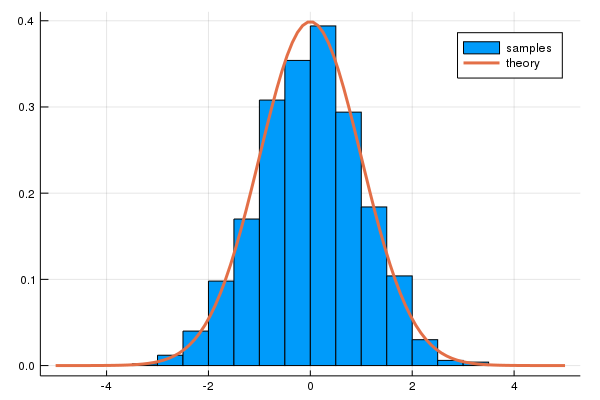

In [5]:
# generate random numbers
nsamples=1000
phi=randn(nsamples)

# theory
xx = linspace(-5.0, 5.0, 100)
yy = exp.(-xx.^2/2) / sqrt(2*π)

# plot out data
histogram(phi,normed=true,bins=20, label="samples")
plot!(xx,yy,lw=3, label="theory")

---

## 1.2 Gaussian numbers with any mean and variance

Non-standard normals may have a non-zero mean and a variance that is different from unity.

$x=\mu+\sigma\phi$

So that $\langle x\rangle=\mu+\sigma\langle \phi\rangle=\mu$

and

Var$(x)=\langle x^2\rangle-\langle x\rangle^2=\langle\left(\mu+\sigma\phi\right)^2\rangle-\mu^2=2\sigma\mu\langle\phi\rangle+\sigma^2\langle\phi^2\rangle$

so

Var$(x)=\sigma^2$

These can be straightforwardly generated numerically and have the distribution

 $$ p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp(-(x-\mu)^2/2\sigma^2) $$

The Julia module `Distributions.jl` does this work for us (and much more - review Lecture 3 for more details)

In [6]:
using Distributions


In [7]:
?Distributions

search: Distributions Distribution MatrixDistribution NonMatrixDistribution



A Julia package for probability distributions and associated functions.

API overview (major features):

  * `d = Dist(parameters...)` creates a distribution instance `d` for some distribution `Dist` (see choices below) with the specified `parameters`
  * `rand(d, sz)` samples from the distribution
  * `pdf(d, x)` and `logpdf(d, x)` compute the probability density or log-probability density of `d` at `x`
  * `cdf(d, x)` and `ccdf(d, x)` compute the (complementary) cumulative distribution function at `x`
  * `quantile(d, p)` is the inverse `cdf` (see also `cquantile`)
  * `mean(d)`, `var(d)`, `std(d)`, `skewness(d)`, `kurtosis(d)` compute moments of `d`
  * `fit(Dist, xs)` generates a distribution of type `Dist` that best fits the samples in `xs`

These represent just a few of the operations supported by this package; users are encouraged to refer to the full documentation at http://distributionsjl.readthedocs.org/en/latest/ for further information.

Supported distributions:

```
Arcsine, Bernoulli, Beta, BetaBinomial, BetaPrime, Binomial, Biweight,
Categorical, Cauchy, Chi, Chisq, Cosine, DiagNormal, DiagNormalCanon,
Dirichlet, DiscreteUniform, DoubleExponential, EdgeworthMean,
EdgeworthSum, EdgeworthZ, EmpiricalUnivariateDistribution, Erlang,
Epanechnikov, Exponential, FDist, FisherNoncentralHypergeometric,
Frechet, FullNormal, FullNormalCanon, Gamma, GeneralizedPareto,
GeneralizedExtremeValue, Geometric, Gumbel, Hypergeometric,
InverseWishart, InverseGamma, InverseGaussian, IsoNormal,
IsoNormalCanon, Kolmogorov, KSDist, KSOneSided, Laplace, Levy,
Logistic, LogNormal, MixtureModel, Multinomial, MultivariateNormal,
MvLogNormal, MvNormal, MvNormalCanon, MvNormalKnownCov, MvTDist,
NegativeBinomial, NoncentralBeta, NoncentralChisq, NoncentralF,
NoncentralHypergeometric, NoncentralT, Normal, NormalCanon,
NormalInverseGaussian, Pareto, Poisson, PoissonBinomial,
QQPair, Rayleigh, Skellam, SymTriangularDist, TDist, TriangularDist,
Triweight, Truncated, TruncatedNormal, Uniform, UnivariateGMM,
VonMises, VonMisesFisher, WalleniusNoncentralHypergeometric, Weibull,
Wishart, ZeroMeanIsoNormal, ZeroMeanIsoNormalCanon,
ZeroMeanDiagNormal, ZeroMeanDiagNormalCanon, ZeroMeanFullNormal,
ZeroMeanFullNormalCanon
```


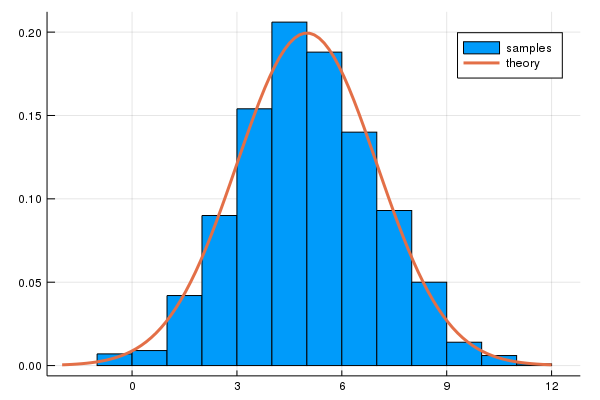

In [8]:
# Gaussian Distribution with mean μ=5.0 and standard deviation σ = 2.0
D = Normal(5.0, 2.0)

# generate 1000 random numbers
x = rand(D, 1000)

histogram(x, normed=true, bins=20, label="samples")
xx = linspace(-2, 12, 100)
plot!(xx, pdf.(D, xx), lw=3, label="theory")

---

## 1.3 Sums of Gaussian random numbers 

Sum of Gaussians is still a Gaussian. 

Let $x_1=\mu_1+\sigma_1\phi_1$ and $x_2 = \mu_2 + \sigma_2\phi_2$ and define

$x_3=x_1+x_2$

so that

$x_3=\mu_1+\mu_2+\sigma_1\phi_1+\sigma_2\phi_2$

Hence the mean is $\mu_3=\mu_1+\mu_2$ and variance is $\sigma_3^2=\sigma_1^2+\sigma_2^2$

Note that this means the sum of $N$ identical Gaussians is $N\mu$ and the variance is $N\sigma^2$.

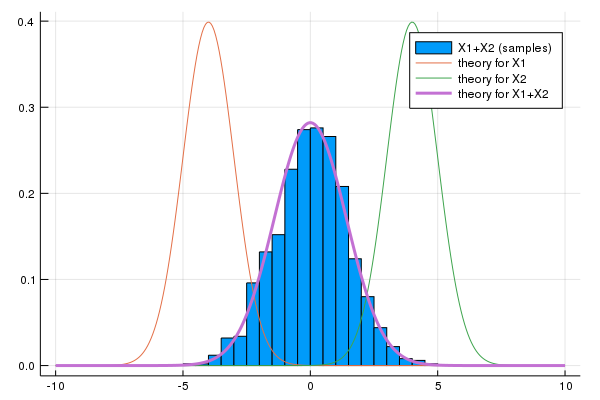

In [9]:
# two gaussian distributions with different parameters
μ1, μ2, σ1, σ2 = -4.0, 4.0, 1.0, 1.0
D1 = Normal(μ1, σ1)
D2 = Normal(μ2, σ2)

# generate the samples
nsamples=1000
x1 = rand(D1, nsamples)
x2 = rand(D2, nsamples)
x = x1 + x2 # sum of RVs

# theoretical distribution 
μ, σ = μ1 + μ2, sqrt(σ1^2+σ2^2)
D = Normal(μ, σ)

# some plots
xx=linspace(-10, 10, 300)
histogram(x1+x2,normed=true,bins=20,label="X1+X2 (samples)")
plot!(xx,pdf.(D1, xx),label="theory for X1")
plot!(xx,pdf.(D2, xx),label="theory for X2")
plot!(xx,pdf.(D, xx),label="theory for X1+X2", lw=3)

---

## 1.4 Sums of other random variables: binary example

If you add many (independent, identically distributed) random variables together, regardless of their distribution, they tend towards a Gaussian.

Imagine $x$ has mean and variance $\mu$ and $\sigma^2$. A sum of $N$ of these

$X_N=\sum_{k=1}^Nx_k$

has mean $N\mu$ and variance $N\sigma^2$. Hence, we expect it to be well approximated by

 $$ p(X)=\frac{1}{\sqrt{2\pi N\sigma^2}}\exp(-(X-N\mu)^2/2N\sigma^2) $$

---

**Example using binary random numbers**

Consider a random number x where

$x=1$ with probability $p$  
$x=0$ with probability $1-p$

Mean of $x$ is $\mu=\langle x \rangle=(1\times p)+(0\times(1-p))=p$

Variance of $x$ is Var$(x)=\sigma^2=\langle x^2 \rangle - \langle x \rangle^2=\langle x \rangle - \langle x \rangle^2=p(1-p)$

So a sum $X$ of $N$ of these numbers has mean $Np$ and Variance $Np(1-p)$.

We can now compare sums of $N$ of these numbers, with different values of $N$, with a Gaussian that has the same mean and variance.

In [10]:
?Binomial

search: Binomial binomial PoissonBinomial NegativeBinomial BetaBinomial



```
Binomial(n,p)
```

A *Binomial distribution* characterizes the number of successes in a sequence of independent trials. It has two parameters: `n`, the number of trials, and `p`, the probability of success in an individual trial, with the distribution:

$$
P(X = k) = {n \choose k}p^k(1-p)^{n-k},  \quad \text{ for } k = 0,1,2, \ldots, n.
$$

```julia
Binomial()      # Binomial distribution with n = 1 and p = 0.5
Binomial(n)     # Binomial distribution for n trials with success rate p = 0.5
Binomial(n, p)  # Binomial distribution for n trials with success rate p

params(d)       # Get the parameters, i.e. (n, p)
ntrials(d)      # Get the number of trials, i.e. n
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Binomial distribution on Wikipedia](http://en.wikipedia.org/wiki/Binomial_distribution)


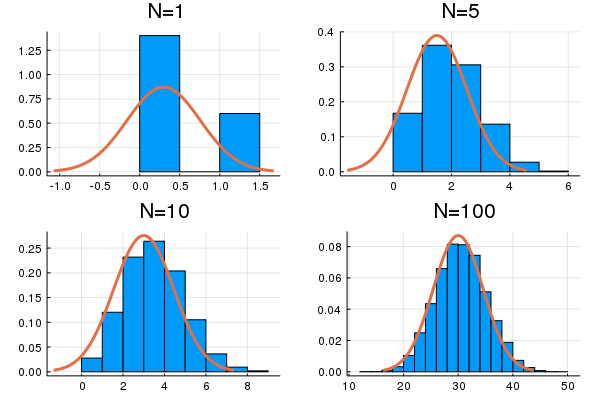

In [11]:
# Create a binary distribution with 0.3 probability 
# of a 1 for the binary random numbers
p = 0.3
D = Binomial(1, p)

# sums of random numbers:
# XN(N) returns a single random number 
#    x1 + ... + xN where all xi ~ D
XN(N) = sum(rand(D, N))

# XN(N, nsamples) returns `nsamples` samples 
# drawn from XN
XN(N, nsamples) = [ XN(N) for _=1:nsamples ]

# generate some samples and plots to check the theory
nsamples=10000
NN = [1, 5, 10, 100] # sum over 1, 10, 100, 1000 binary RVs
PP = []                 # plots
for N in NN 
    # generate samples 
    X = XN(N, nsamples)
    # calculate mean and standard deviations for X1 and X2
    # and generate the relevant Gaussian distributions 
    μ, σ = p*N, sqrt(p*(1-p)*N)
    DN = Normal(μ, σ)
    # plot the RVs as well as the theoretical distribution
    xx = linspace(μ-3*σ, μ+3*σ, 200)
    P = histogram(X, normed=true, bins=min(20, N+1))  # EXPERIMENT WITH THE NUMBER OF BINS!!!
    P = plot!(P, xx, pdf.(DN, xx), lw=3, legend=false, # xlim=(μ-3*σ, μ+3*σ),
              title="N=$N" )
    push!(PP, P)  # append the new plot to the list of plots
end 

plot(PP...)  # same as plot(PP[1], PP[2], PP[3], PP[4])

---

## 1.5 Summary points

* Large sums $X$ of $N$ identical, independent random numbers $x_k$ can be well approximated by a Gaussian distribution.


* In the context of diffusion, this means that whatever the form of the small hops, at large scales and long times the distribution of diffusing objects will have a Gaussian distribution.



* The mean $\mu=\langle{x}\rangle$ and variance $\sigma^2=\langle x^2\rangle-\langle x\rangle^2$ of the random numbers that make up the sum can be used to calculate the mean and variance of $X$



* So that $\langle X \rangle=N\langle x \rangle$ and Var$(X)=N$Var$(x)$.



---

---

# Section 2. Diffusion

* **2.1** Simulating diffusion in one dimension 
* **2.2** Discrete space versus continuous space
* **2.3** Diffusion in two dimensions
* **2.4** Diffusion as a stochastic differential equation
* **2.5** Summary points

---

## 2.1 Simulating diffusion in one dimension

Diffusion is the result of many random hops: $x=h_1+h_2+...h_k$  
which is just a sum of random numbers so we can use previous results.

Parameterise a random walker, or diffusing particle by  
mean velocity $v$  
diffusion constant $D$  


To simulate the motion for a time $T$ we need to breakdown time into steps $dt$, with a hop each step  
Total number of hops is $T/dt$

The statistics of the diffusion should not depend on the time step.  
Some care is needed so that results independent on $dt$.

**Setting up the problem correctly in time**

After a time $T$ the particle will on average be at a position $vT$ with variance $2DT$.

Let's assume that the microscopic hops are Gaussians with mean $\mu$ and variance $\sigma^2$

After a time $T$ the mean position is $\mu T/dt$ and variance is $\sigma^2 T/dt$.

Hence we need $\mu=v dt$ and $\sigma=\sqrt{2D dt}$.




In [12]:

# parameters
# -----------
T = 5.0                # final time
dt1, dt2 = 0.01, 0.5   # try two different time-steps 
np = 1000              # number of particles (equivalent to the samples previously)
v = 0.1                # velocity
c = 0.2                # diffusion constant

# Compute the stochastic trajectories 
# -----------------------------------
# number of steps for the two examples
nt1, nt2 = ceil(Int, T/dt1), ceil(Int, T/dt2)


# We store the particle states (positions) in a matrix, where column is time, 
# rows are the particles. 
# By slicing appropriately, this allows us to efficiently access
#  (i)  the trajectory for a single particle
#  (ii) the configuration of the system at any time t
x1, x2 = zeros(nt1, np), zeros(nt2, np)


# and finally the distributions needed for the evolution
D1, D2 = Normal(v*dt1, sqrt(2*c*dt1)), Normal(v*dt2, sqrt(2*c*dt2))

# here is the simulation evolving the system forward 

# in time with time-step dt1 
for k = 1:nt1-1
    x1[k+1, :] = x1[k, :] + rand(D1, np)
    # in "raw" Julia (without Distributions.jl) this could 
    # also be written in the form below, which can sometimes
    # be preferrable
    # x1[k+1,:] = x1[k,:] + v*dt1 + sqrt(2*D*dt1)*randn(np)
end

# ... and the same for dt = dt2 
for k = 1:nt2-1
    x2[k+1, :] = x2[k, :] + rand(D2, np)
   # x2[k+1,:]=x2[k,:] + v*dt2 + sqrt(2*D*dt2)*randn(np) 
end

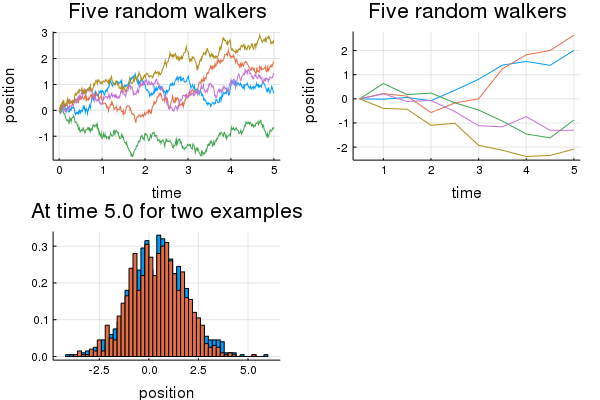

In [13]:
# plot out the data
# time grids for the plots
t1=dt1*collect(1:nt1)
t2=dt2*collect(1:nt2)


p1=plot(t1,x1[:,1:5],xlabel="time",ylabel="position",legend=false,title="Five random walkers")
p2=plot(t2,x2[:,1:5],xlabel="time",ylabel="position",legend=false,title="Five random walkers")

p3=histogram(x1[end,:],normed=true,bins=50,title="At time $T for two examples")
p3=histogram!(x2[end,:],normed=true,bins=50,xlabel="position",legend=false)

plot(p1,p2,p3)

---

## 2.2 Discrete space versus continuous space

For many situations it is convenient to consider space as a grid of points  
so the walker is on a lattice on which it hops to neighbouring points.

Consider a case where a walker hops forward with probability $p$ or stays still $1-p$ per time step.  
Note: this is like a sum of binary random numbers which we know converges to a Gaussian.  

After a time $T$ we still need the particle on average to be at position $vT$ with variance $2DT$.  
What value does $p$ need to take?

In this case $\langle h \rangle=p$ and Var$(h)=\langle h^2\rangle-\langle h\rangle^2=p(1-p)$

Hence $p=vdt$ and so because $p(1-p)=2Ddt$ we also have $D\sim v/2$.  
This links the allowable velocity $v$ and diffusion constant $D$ for this walker.

The sum of binary numbers converges to a Gaussian distribution.  
We therefore expect that these walkers will have the distribution

$$ p(X)=\frac{1}{\sqrt{2\pi vt}}\exp(-(X-vt)^2/2vt) $$

In [14]:
# parameters
v=5  # velocity of the walker
T=10 # time of the simlation

dt=0.01 # time step 
nt=Int(ceil(T/dt)) # number of time steps
t=dt*collect(1:nt) # times for the plots

p=dt*v # hop probability per time step

np=1000 # number of walkers
x=zeros(nt,np) # matrix of walkers: column is time rows are for each particle

# simulate the system
for k=1:nt-1
    x[k+1,:]=x[k,:] + 1.0(rand(np).<p)
end

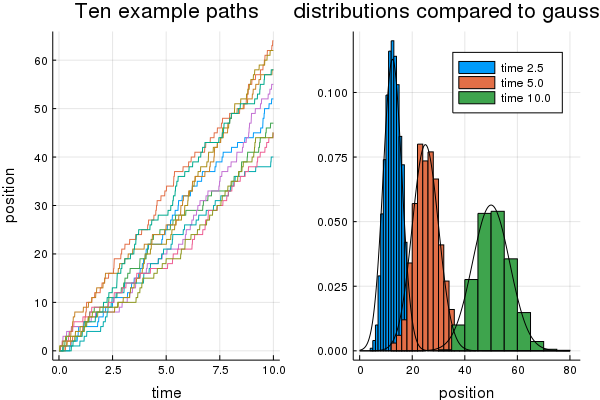

In [15]:
# consider three time points
t1=2.5; s1=Int(t1/dt)
t2=5.0; s2=Int(t2/dt)
t3=10.0; s3=Int(t3/dt)

# the theory
xx=collect(0:0.1:80)
D1 = Normal(t1*v,sqrt(t1*v))
D2 = Normal(t2*v,sqrt(t2*v))
D3 = Normal(t3*v,sqrt(t3*v))
y1 = pdf.(D1,xx)
y2 = pdf.(D2,xx)
y3 = pdf.(D3,xx)

# plots
p1=plot(t,x[:,1:10],legend=false,title="Ten example paths",xlabel="time",ylabel="position")

p2=histogram(x[s1,:],normed=true,bins=20,label="time $t1")
p2=histogram!(x[s2,:],normed=true,bins=20,label="time $t2")
p2=histogram!(x[s3,:],normed=true,bins=20,label="time $t3")

p2=plot!(xx,y1,color=[:black],label="",xlabel="position",title="distributions")
p2=plot!(xx,y2,color=[:black],label="",title="distributions compared to gaussians")
p2=plot!(xx,y3,color=[:black],label="")

plot(p1,p2)

--- 

## 2.3 Diffusion in two dimensions

So far we have considered diffusion that is one dimension only.  

It is straightforward to generalise to 2D or 3D (or higher dimensions!)

We assume that the random hops in the $x$ and $y$ direction are independent.

For 2D the distribution of a walker with position $(x,y)$ we:  
allow for velocity components $v_x$ and $v_y$  
assume that the diffusion is isotropic 

In this case the distribution is simply the product of two gaussians

 $$ p(x,y)=\frac{1}{(4\pi Dt)}\exp\left(-\frac{1}{4Dt}\left((x-v_xt)^2+(y-v_yt)^2\right)\right) $$

Note that the factor in front of the exponential is now the square of that for 1D.
 
The mean position $(x,y)$ at a time t is $(v_xt,v_yt)$  
The variance in the position $(x-v_xt)^2+(y-v_yt)^2=4Dt$ (Note: this is twice that for 1D)

In [16]:
# NB: this is a continuous-space simulation

# parameters
# -----------
c  = 2.0   # diffusion constant
T  = 5.0   # final time 
dt = 0.01  # time step
np = 100   # number of particles

# the simulation
# --------------
nt = ceil(Int, T/dt)    # number of steps 
tt = dt*collect(1:nt)   # vector of times
# allocate solution: column is time, rows are particles
x=zeros(nt,np)      # x coordinate
y=zeros(nt,np)      # y coordinate 
# evolve the system
D = Normal(0, sqrt(2*c*dt))
for k=1:nt-1
    x[k+1,:] = x[k,:] + rand(D, np)
    y[k+1,:] = y[k,:] + rand(D, np)
end

In [17]:
# plot out np particles
# NB: plotting too many particles can take
#     a long time 
#np=10

#animation = @gif for k=5:5:nt 
#    p1 = plot(x[1:k,1:np],y[1:k,1:np],
#              title="step $k. time=$(round(dt*k,1))",
#              legend=false, size=(500, 500), 
#              xlim=[-10,10],ylim=[-10,10] )
#    scatter!(p1, x[k,1:np],y[k,1:np])
#end

![ani](imgL8/Simulation1.gif)

--- 

## 2.4 Diffusion as a stochastic differential equation

We saw in Section 2.1 that an alternative way of simulating the diffusion was


In [18]:

# parameters
# -----------
T = 5.0                # final time
dt = 0.01              # timesteps 
np = 1000              # number of particles (equivalent to the samples previously)
v = fill(0.1,np)       # velocity
c = 0.2                # diffusion constant

# Compute the stochastic trajectories 
# -----------------------------------
# number of steps for the two examples
nt = ceil(Int, T/dt)


# We store the particle states (positions) in a matrix, where column is time, rows are the particles. 
# By slicing appropriately, this allows us to efficiently access
#  (i)  the trajectory for a single particle
#  (ii) the configuration of the system at any time t
x = zeros(nt, np)

# here is the simulation evolving the system forward 

# in time with time-step dt1 
for k = 1:nt-1
     x[k+1,:] = x[k,:] + v*dt + sqrt(2*c*dt)*randn(np)
end


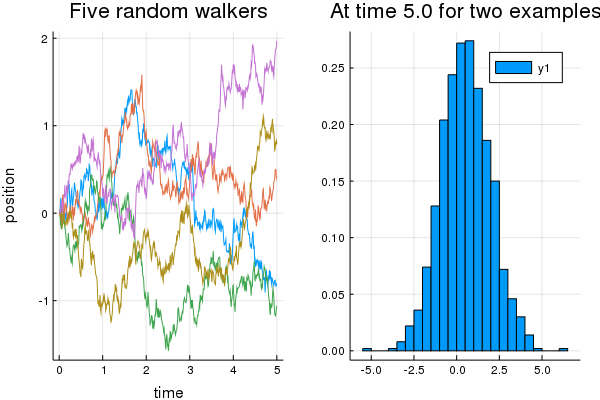

In [19]:
# plot out the data
# time grids for the plots
t=dt*collect(1:nt)


p1=plot(t,x[:,1:5],xlabel="time",ylabel="position",legend=false,title="Five random walkers")

p2=histogram(x[end,:],normed=true,bins=50,title="At time $T for two examples")

plot(p1,p2)

This can be seen as a forward Euler discretisation of the *stochastic differential equation*:

$$ \frac{dx}{dt} = v + \sqrt{2D} \frac{dw}{dt}.$$

Here, the variable $w$ is white noise (which is a diffusion with mean zero and variance one).


In this case, the discretisation is called *Euler-Maruyama* (instead of forward Euler, see Lecture 3).


--- 

## 2.5 Summary points

Diffusion can be modelled as the summation of many random hops.  


Simulations are made of many time steps of size $dt$. These can be any value as long as they are small enough.    
Careful scaling of the hop statistics is required if the particle statistics are to be independent of $dt$.


Simulations can be performed by keeping an account of the particle positions.


Alternatively, diffusion can also be modelled as the solution of a *stochastic differential equation*.  





--- 

---

# **Section 3.** Interacting particles  
* **3.1** Systems of stochastic differential equations
* **3.2** Interacting particles in 1D
* **3.3** Interacting particles in 2D
* **3.4** Collective behaviour and crowd dynamics
* **3.5** Summary points


---

## 3.1 (Systems of) Stochastic differential equations

So far, we only considered diffusions which have a fixed mean and variance.

However, we can simulate more complicated situations.

Consider **one** particle moving in a potential $V(x)$ (like, for example, in Lecture 5), 
but which is also influenced by noise. In this case, the stochastic differential equation is

$$ \frac{dx}{dt} = -V'(x) + \sqrt{2D} \frac{dw}{dt}$$

**Note that** the noise can also be influenced by the position of the particle. 
In that case we would have an extra function $G(x)$ in front of $\sqrt{2D}$. 
However, we will not consider that today.

**Lecture Question:** Write a code that solves the previous equation for the potential $V(x) = \frac{x^2}{2}$ and $D = 0.2$.

Now let's consider more complicated potentials, for example $V(x) = \frac{x^4}{4}-\frac{x^2}{2}$. 

In [20]:
# parameters
# -----------
T = 1000.0                # final time
dt = 0.1              # timesteps 
np = 1                 # number of particles (equivalent to the samples previously)
D = 0.1                # diffusion constant

# number of steps for the two examples
nt = ceil(Int, T/dt)


# Store the particle position in a vector
x = zeros(nt,1)

# here is the simulation evolving the system forward 

# in time with time-step dt
for k = 1:nt-1
     x[k+1,:] = x[k,:] - (x[k,:].^3 - x[k,:])*dt + sqrt(2*D*dt)*randn(np)
end


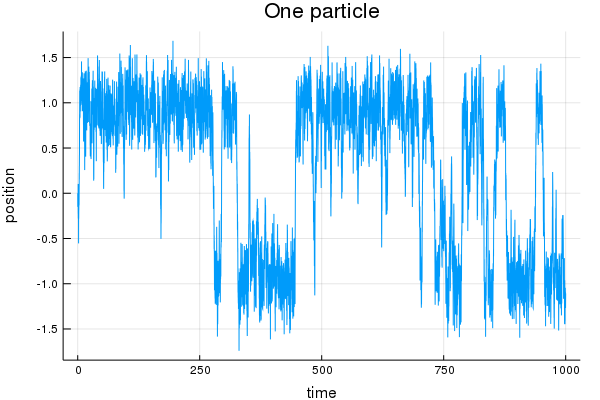

In [21]:
# plot out the data
# time grids for the plots
t=dt*collect(1:nt)


p1=plot(t,x[:,:],xlabel="time",ylabel="position",legend=false,title="One particle")


plot(p1)

And as with the diffusions, we can solve this for any number of particles!

In [22]:
# parameters
# -----------
T = 1000.0               # final time
dt = 0.1                # timesteps 
np = 100               # number of particles (equivalent to the samples previously)
D = 0.1                 # diffusion constant

# number of steps for the two examples
nt = ceil(Int, T/dt)


# Store the particle position in a vector
x = zeros(nt,np)

# here is the simulation evolving the system forward 

# in time with time-step dt
for k = 1:nt-1
     x[k+1,:] = x[k,:] - (x[k,:].^3 - x[k,:])*dt + sqrt(2*D*dt)*randn(np)
end


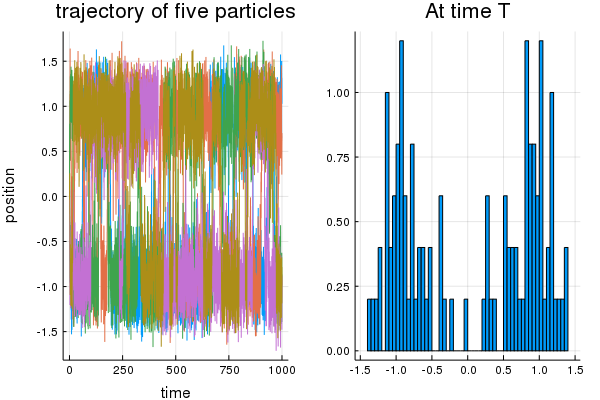

In [23]:
# plot out the data
# time grids for the plots
t=dt*collect(1:nt)


p1=plot(t,x[:,1:5],xlabel="time",ylabel="position",legend=false,title="trajectory of five particles")

p2=histogram(x[end,:],normed=true,legend=false,bins=50,title="At time T")

plot(p1,p2)

---

## 3.2 Interacting particles in 1D

In the last case the particles weren't really interacting (there were $np = 1000$ particles in the simulation but they don't "see" each other).

Now consider a case where the particles interact. 

For example, assume that the particles want to stay together (i.e., they are attracted to each other). In this case, we can write the stochastic differential equation as

$$ \frac{dX_i}{dt}= -V'(X_i) - \alpha\frac{1}{N}\sum_{j=1}^{N} (X_i-X_j) + \sqrt{2d}\frac{dw_i}{dt},$$

where now the position of particle $i$ is denoted by $X_i$ and $\alpha$ measures how "attracted" the particles are to each other. 

Expanding the sum we can write instead

$$ \frac{dX_i}{dt}= -V'(X_i) - (X_i-\bar{X}) + \sqrt{2d}\frac{dw_i}{dt},$$

where $\bar{X} = \frac{1}{N}\sum_{j=1}^{N}X_j$ is the *mean* of the positions of the particles.

In [24]:
# parameters
# -----------
T = 1000.0               # final time
dt = 0.1                 # timesteps 
np = 100                  # number of particles (equivalent to the samples previously)
D = 1.1                  # diffusion constant
alpha = 0.5

# number of steps for the two examples
nt = ceil(Int, T/dt)


# Store the particle position in a vector
x = zeros(nt,np)
mean_x = zeros(nt,1)
# here is the simulation evolving the system forward 

# in time with time-step dt
for k = 1:nt-1
    x[k+1,:] = x[k,:] - (x[k,:].^3 - x[k,:])*dt - alpha*(x[k,:]-mean(x[k,:]))+ sqrt(2*D*dt)*randn(np)
    mean_x[k+1]= mean(x[k+1,:])
end


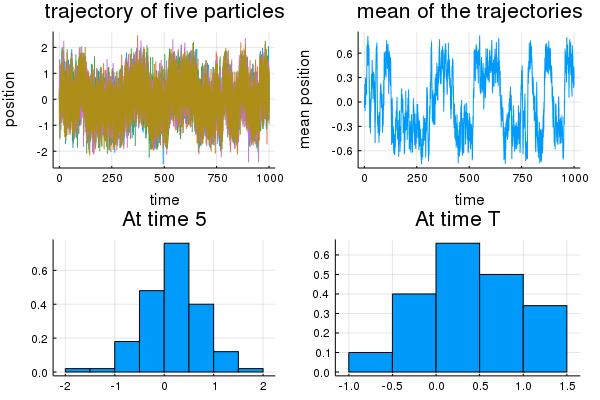

In [25]:
# plot out the data
# time grids for the plots
t=dt*collect(1:nt)


p1=plot(t,x[:,1:5],xlabel="time",ylabel="position",legend=false,title="trajectory of five particles")

p2=plot(t,mean_x,xlabel="time",ylabel="mean position",legend=false,title="mean of the trajectories")
p3=histogram(x[50,:],normed=true,legend=false,bins=10,title="At time 5")

p4=histogram(x[end,:],normed=true,legend=false,bins=10,title="At time T")

plot(p1,p2,p3,p4)

In general, systems of interacting particles can be written as a stochastic differential equation which has sets of rules:

$$ \frac{dX_i}{dt} = -F'(X_i) - G'(X_1,\dots,X_{np}) + \sqrt{2D}\frac{dw_i}{dt}$$

where

- $F(x)$ is called a *confining potential* (it tells you something about where the particles are moving)
- $G(x)$ is called the *interacting potential* (it tells you how the particles interact).

Examples of interacting potentials

- attracting potential $G(x) = \frac{x^2}{2}$ (the particles are attracted to the center of mass)
- repulsive potential $G(x) = -\frac{x^2}{2}$ (the particles want to stay as far from each other as possible)
- the most common examples of potentials depend on the distance between the particles

## 3.3 Interacting particles in 2D

We can do similar simulations in 2D. For example, the same system as before, but moving in two dimensions is as follows:

In [26]:
# parameters
# -----------
T = 1000.0               # final time
dt = 0.1                # timesteps 
np = 50                 # number of particles (equivalent to the samples previously)
Dx = 1.1                 # diffusion constant
Dy = 1.25                # diffusion constant
alpha = 1

# number of steps for the two examples
nt = ceil(Int, T/dt)


# Store the particle position in a vector
x, y = zeros(nt,np),  zeros(nt,np)
mean_x, mean_y = zeros(nt,1), zeros(nt,1)



for k = 1:nt-1
    x[k+1,:] = x[k,:] - (x[k,:].^3 - x[k,:])*dt - alpha*(x[k,:]-mean(x[k,:]))+ sqrt(2*Dx*dt)*randn(np)
    y[k+1,:] = y[k,:] - (y[k,:].^3 - y[k,:])*dt - alpha*(y[k,:]-mean(y[k,:]))+ sqrt(2*Dy*dt)*randn(np)
    mean_x[k+1]= mean(x[k+1,:])
    mean_y[k+1]= mean(y[k+1,:])
end


In [27]:
# plot out np particles
#np=20
    
#animation = @gif for k=5:10:2005 
#    p1 = plot(x[k-4:k,1:np],y[k-4:k,1:np],
#              title="step $k. time=$(round(dt*k,1))",
#              legend=false, size=(500, 500), 
#              xlim=[-2,2],ylim=[-2,2] )
#    scatter!(p1, x[k,1:np],y[k,1:np])
#end

![ani](imgL8/2D4Wells.gif)

In [28]:
# plot out mean position of the particles
    
#animation = @gif for k=5:10:nt
#    p1 = plot(mean_x[1:k],mean_y[1:k],
#              title="step $k. time=$(round(dt*k,1))",
#              legend=false, size=(500, 500), 
#              xlim=[-2,2],ylim=[-2,2] )
#    plot(p1)
#end

![ani](imgL8/Mean.gif)

---

## 3.4 Collective behaviour and crowd dynamics

Then how can we model pedestrians (individuals, or crowds!), or any other example of collective behaviour (like the schools of fish, or flocks of birds from the examples)?

In these cases, it is more usual to model the **position and speed** of each "particle". This is because people (or animals!) tend to align their velocities, rather than position.

For this, we use Newton's laws of motion and obtain a system for each particle.
$$\frac{dX_i}{dt} = V_i $$

$$\frac{dV_i}{dt} = F(X_i) + G_1(X_1,\dots,X_{np}) + G_2(V_1,\dots,V_{np}) + \sqrt{2D}\frac{dW_i}{dt}$$

**Note that** often there is only one function $G$ that depends on *all* the particles (via their position/distance to each other, and velocity).

---

Now let's see how to model of pedestrians using systems of interacting particles.

**Lecture Question:**  How would you leave this room?


---

A famous example of a collective dynamics model is the Cucker-Smale model. This is given by
$$\frac{dX_i}{dt} = V_i $$

$$\frac{dV_i}{dt} = \frac{\lambda}{N}\sum_{j=1}^N \psi(\|X_j-X_i\|)(v_j-v_i)$$

where $N$ is the number of particles and the function $\psi$ models alignment of velocities:
$$\psi(\|X_j-X_i\|) = \frac{1}{(1+\|X_j-X_i\|^2)^\beta}$$


In [29]:
T = 20               # final time
dt = 0.01                # timesteps 
np = 50                 # number of particles (equivalent to the samples previously)
nt = ceil(Int, T/dt)

# parameters of the model
lambda = 1
beta = 0.5 # 20       - for small beta, the particles self-organise

# store position, speed and gradient of U
x1 = zeros(nt,np)
x2 = zeros(nt,np)
v1 = zeros(nt,np)
v2 = zeros(nt,np)

x1[1,:] = 5*rand(np) + 0.5*randn(np)
x2[1,:] = 5*rand(np) + 0.5*randn(np)

v1[1,:] = 0.5*rand(np)
v2[1,:] = 0.5*rand(np)

# function to evaluate Psi

function Psi(x1,x2,v1,v2,beta,k,np)
    A = zeros(2,np);
    for i = 1:np
        for j = 1:np
            if i != j
                d = (x1[k,i]-x1[k,j])^2 +(x2[k,i]-x2[k,j])^2
                A[1,i] = A[1,i] + 1/(1+d)^beta*(v1[k,j]-v1[k,i]); 
                A[2,i] = A[2,i] + 1/(1+d)^beta*(v2[k,j]-v2[k,i]); 
            end
        end
    end
    return A
end

# time step
for k = 1:nt-1
    x1[k+1,:] = x1[k,:] + v1[k,:]*dt
    x2[k+1,:] = x2[k,:] + v2[k,:]*dt
    
    P = Psi(x1,x2,v1,v2,beta,k,np)
    v1[k+1,:] = v1[k,:] + dt*(P[1,:])
    v2[k+1,:] = v2[k,:] + dt*(P[2,:])
end



In [30]:
# plot out np particles
#np=50
#animation = @animate for k=10:nt 
#    p1 = quiver(x1[k,1:np],x2[k,1:np], quiver = (v1[k,1:np],v2[k,1:np]),
#              title="time=$(round(dt*k,1))",
#              legend=false, size=(500, 500), 
#              xlim=[0,10],ylim=[0,10] )
#    scatter!(p1, x1[k,1:np],x2[k,1:np])
#end


#gif(animation,"CS20.gif", fps=20)

![ani](imgL8/CS20.gif)

![ani](imgL8/CS05.gif)

With some (a lot!) more work, we can model pedestrians with rational behaviour - see http://rafaelbailo.com/rationalbehaviour/

## 3.5 Summary points

Simulating interacting particles is useful for models of collective behaviour (pedestrians, flocks of birds, swarms of bees, etc).

Interacting particles are diffusions with different rules (attraction, repulsion, ...).


Stochastic simulations are a powerful tool form modelling interactions in the real world.  